# 15 - Mass-Benefit Analysis - Uranus

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from AMAT.planet import Planet

In [2]:
planet = Planet("URANUS")

In [3]:
ISP  = 320.0
g0   = 9.80665

peri_alt_km    = 4000.0
apoa_alt_km_pp = 903323.04470317   
apoa_alt_km_ab = 4962409.1142301

In [4]:
energy_pp      = -planet.GM / ((planet.RP+apoa_alt_km_pp*1E3 + peri_alt_km*1E3 + planet.RP))
energy_ab      = -planet.GM / ((planet.RP+apoa_alt_km_ab*1E3 + peri_alt_km*1E3 + planet.RP))

v_peri_orb_pp  =  np.sqrt(2*energy_pp + 2*planet.GM/(peri_alt_km*1E3+planet.RP))
v_peri_orb_ab  =  np.sqrt(2*energy_ab + 2*planet.GM/(peri_alt_km*1E3+planet.RP))

In [5]:
def compute_v_arrival(vinf):
    return np.sqrt(vinf**2 + (2.0*planet.GM)/(peri_alt_km*1E3+planet.RP))

In [6]:
def compute_DV(vinf):
    v_arrival = compute_v_arr(vinf)
    DV_pp     = v_arr - v_peri_orb_pp
    DV_ab     = v_arr - v_peri_orb_ab

    return DV_pp, DV_ab

In [7]:
def compute_fP_prop_pp(vinf_array):
    v_arrival_arr = compute_v_arrival(vinf_array)
    DV_arr        = v_arrival_arr - v_peri_orb_pp
    
    return 1 - 1.12*(1.0 - np.exp(-DV_arr/(ISP*g0)))

In [8]:
def compute_fP_prop_ab(vinf_array):
    v_arrival_arr = compute_v_arrival(vinf_array)
    DV_arr        = v_arrival_arr - v_peri_orb_ab

    return 1 - 1.12*(1.0 - np.exp(-DV_arr/(ISP*g0)))

In [9]:
vinf_array = np.linspace(0.0, 20.0E3, 11)

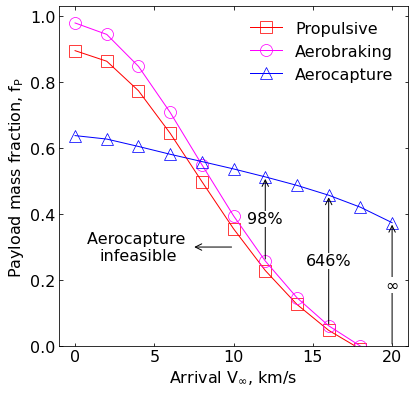

In [11]:
fP_prop_pp    = compute_fP_prop_pp(vinf_array)
fP_prop_ab    = compute_fP_prop_ab(vinf_array)

Q_array    = np.array([41.89E3, 48.6E3, 64.47E3, 83.6E3, 103.6E3,
	                   126.0E3, 152.5E3,183.5E3, 222.8E3, 275.7E3, 
	                   352.0E3])

tps_mf_array = 0.091*np.power(Q_array, 0.51575)/100.0
ess_mf       = 0.23

fP_aero      = 1.0 - ess_mf - tps_mf_array*0.60


fig = plt.figure()
fig.set_size_inches([6.25,6.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)	

plt.plot(vinf_array/1.0E3, fP_prop_pp, linestyle='-', linewidth=1.00, marker='s',ms=12, markerfacecolor="None", markeredgecolor='red', markeredgewidth=0.75, color='red', label='Propulsive')
plt.plot(vinf_array/1.0E3, fP_prop_ab, linestyle='-', linewidth=1.00, marker='o',ms=12, markerfacecolor="None", markeredgecolor='magenta', markeredgewidth=0.75, color='magenta',  label='Aerobraking')
plt.plot(vinf_array/1.0E3, fP_aero,    linestyle='-', linewidth=1.00, marker='^',ms=12, markerfacecolor="None", markeredgecolor='blue', markeredgewidth=0.75, color='blue', label='Aerocapture')

plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.ylabel('Payload mass fraction, '+r'$f_P$' ,fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=16, frameon=False)
ax.set_ylim(0,1.03)
plt.xticks(np.linspace(0,20, 5, endpoint=True), fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylim(0,1.03)

ax.annotate('Aerocapture \ninfeasible',
            xy=(10, 0.3) ,
            xytext=(4, 0.3),
            arrowprops=dict(arrowstyle="<-"),  va="center", ha="center", fontsize=16)


ax.annotate('',
            xy=(vinf_array[6]/1.0E3, fP_prop_ab[6]) ,
            xytext=(vinf_array[6]/1.0E3, fP_aero[6]),
            arrowprops=dict(arrowstyle="<-"),  va="center", ha="center", fontsize=16)



plt.text(vinf_array[6]/1.0E3, 0.5*(fP_prop_ab[6]+fP_aero[6]), 
	    str(int((fP_aero[6] - fP_prop_ab[6])*100/fP_prop_ab[6]))+'%' , 
	    fontsize=16, ha='center', va='center',
	    bbox=dict(facecolor='white', edgecolor='white', pad=0.0)) 

ax.annotate('',
            xy=(vinf_array[8]/1.0E3, fP_prop_ab[8]) ,
            xytext=(vinf_array[8]/1.0E3, fP_aero[8]),
            arrowprops=dict(arrowstyle="<-"),  va="center", ha="center", fontsize=16)

plt.text(vinf_array[8]/1.0E3, 0.5*(fP_prop_ab[8]+fP_aero[8]), 
	    str(int((fP_aero[8] - fP_prop_ab[8])*100/fP_prop_ab[8]))+'%' , 
	    fontsize=16, ha='center', va='center',
	    bbox=dict(facecolor='white', edgecolor='white', pad=0.0)) 

ax.annotate('',
            xy=(vinf_array[10]/1.0E3, 0.0) ,
            xytext=(vinf_array[10]/1.0E3, fP_aero[10]),
            arrowprops=dict(arrowstyle="<-"),  va="center", ha="center", fontsize=16)

plt.text(vinf_array[10]/1.0E3, 0.5*(0.0+fP_aero[10]), 
	    r'$\infty$' , 
	    fontsize=16, ha='center', va='center',
	    bbox=dict(facecolor='white', edgecolor='white', pad=0.0)) 


plt.savefig('../data/jsr-paper/uranus/uranus-mb.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/uranus/uranus-mb.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/uranus/uranus-mb.eps', dpi=300,bbox_inches='tight')

plt.show()